In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.info()
print(churn_data.shape)
print(churn_data.describe)
print("missing values: ")
churn_data.isnull().sum()
churn_data.head()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


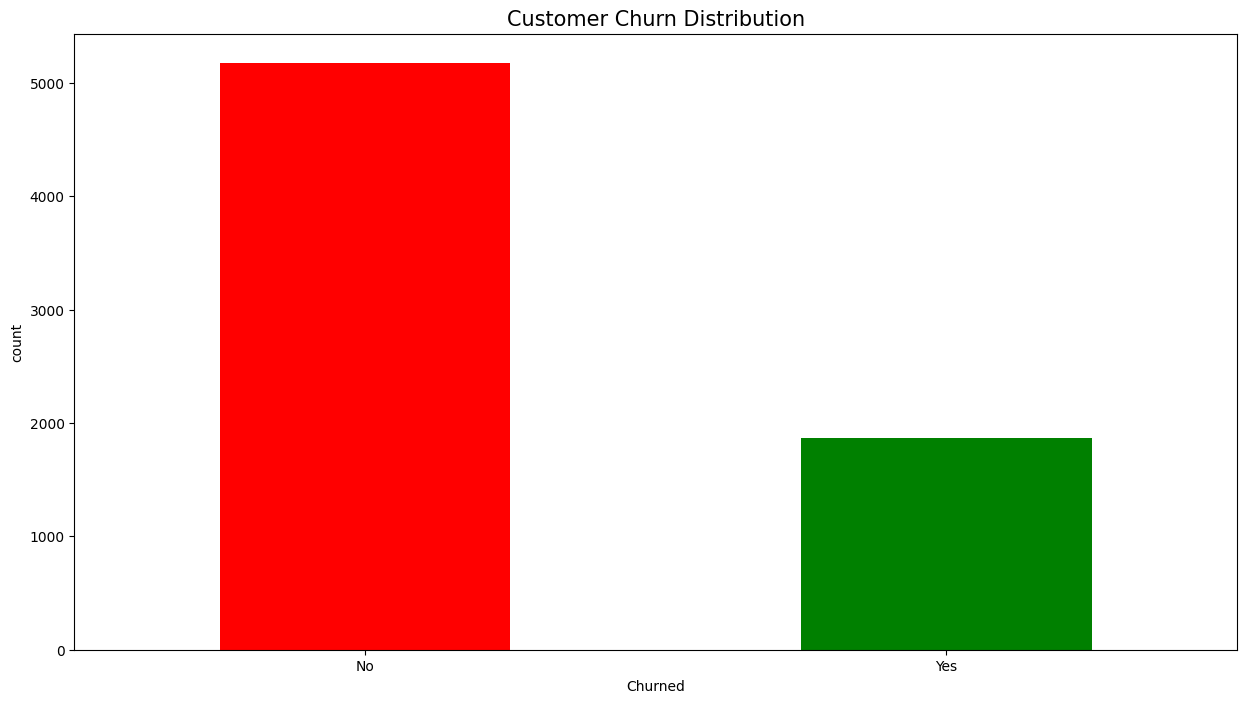

In [3]:
print(churn_data['Churn'].value_counts(normalize = True) * 100)
plt.figure(figsize = (15,8))
churn_data['Churn'].value_counts().plot(kind = 'bar',color = ['red','green'])
plt.tick_params(rotation = 0)
plt.ylabel('count')
plt.xlabel('Churned')
plt.title('Customer Churn Distribution',fontsize = 15)
plt.show()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='str')


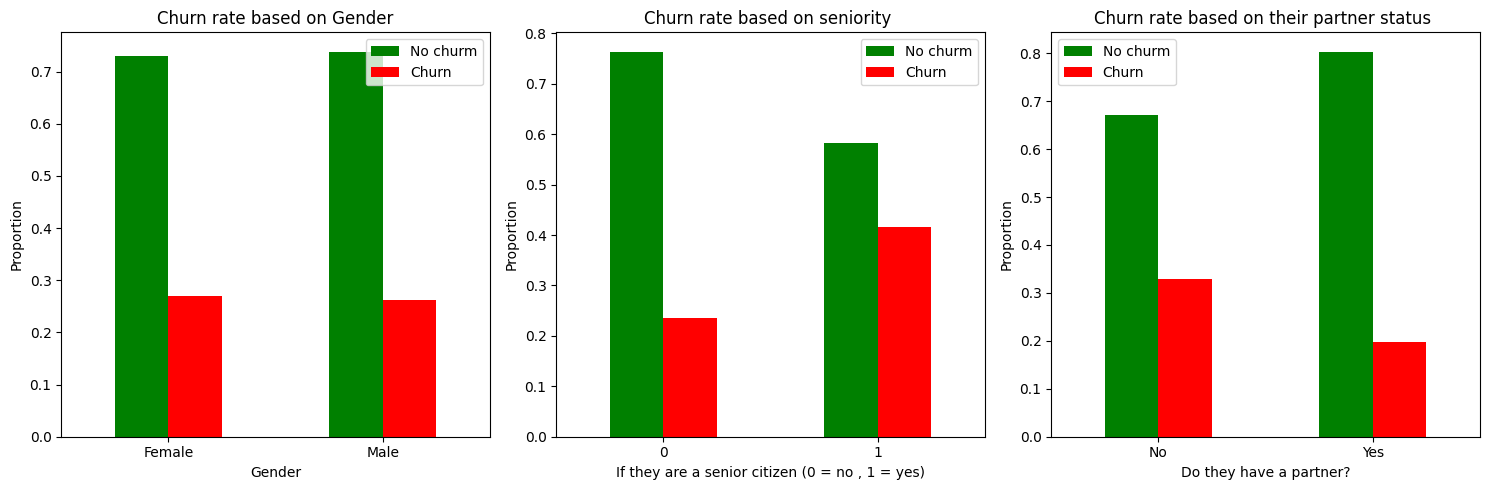

In [4]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
print(churn_data.columns)
#churn visualization based on their gender

pd.crosstab(churn_data['gender'],churn_data['Churn'],normalize = 'index').plot(kind = 'bar',ax = axes [0],color = ['green','red'])
axes[0].set_title('Churn rate based on Gender')
axes[0].set_ylabel('Proportion')
axes[0].set_xlabel('Gender')
axes[0].tick_params(rotation = 0)
axes[0].legend(['No churm','Churn'])

#churn visualization based on seniority vs churn

pd.crosstab(churn_data['SeniorCitizen'],churn_data['Churn'],normalize = 'index').plot(kind = 'bar',ax = axes[1],color = ['green','red'])
axes[1].set_title('Churn rate based on seniority ')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('If they are a senior citizen (0 = no , 1 = yes)')
axes[1].tick_params(rotation = 0)
axes[1].legend(['No churm','Churn'])

#churn visualization based on if they have a partner  vs churn

pd.crosstab(churn_data['Partner'],churn_data['Churn'],normalize = 'index').plot(kind = 'bar',ax = axes[2],color = ['green','red'])
axes[2].set_title('Churn rate based on their partner status ')
axes[2].set_ylabel('Proportion')
axes[2].set_xlabel('Do they have a partner?')
axes[2].tick_params(rotation = 0)
axes[2].legend(['No churm','Churn'])

plt.tight_layout()
plt.show()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='str')


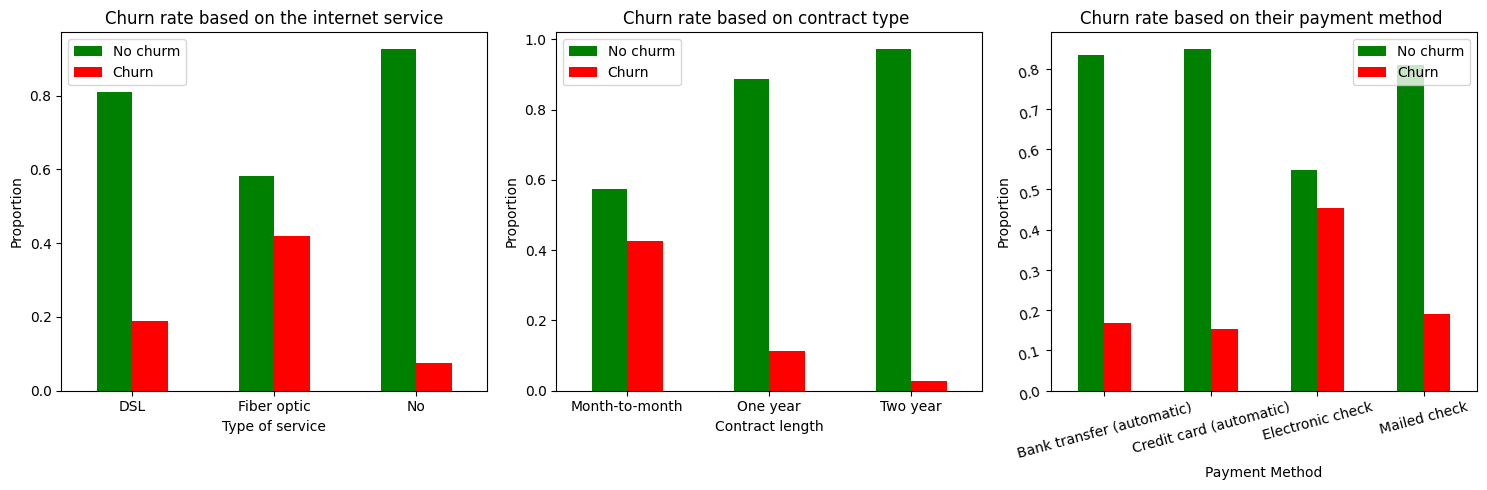

In [5]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
print(churn_data.columns)
#churn visualization based on their service type

pd.crosstab(churn_data['InternetService'],churn_data['Churn'],normalize = 'index').plot(kind = 'bar',ax = axes [0],color = ['green','red'])
axes[0].set_title('Churn rate based on the internet service')
axes[0].set_ylabel('Proportion')
axes[0].set_xlabel('Type of service')
axes[0].tick_params(rotation = 0)
axes[0].legend(['No churm','Churn'])

#churn visualization based on contract 

pd.crosstab(churn_data['Contract'],churn_data['Churn'],normalize = 'index').plot(kind = 'bar',ax = axes[1],color = ['green','red'])
axes[1].set_title('Churn rate based on contract type ')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Contract length')
axes[1].tick_params(rotation = 0)
axes[1].legend(['No churm','Churn'])

#churn visualization based on PaymentMethod

pd.crosstab(churn_data['PaymentMethod'],churn_data['Churn'],normalize = 'index').plot(kind = 'bar',ax = axes[2],color = ['green','red'])
axes[2].set_title('Churn rate based on their payment method ')
axes[2].set_ylabel('Proportion')
axes[2].set_xlabel('Payment Method')
axes[2].tick_params(rotation = 15)
axes[2].legend(['No churm','Churn'])

plt.tight_layout()
plt.show()

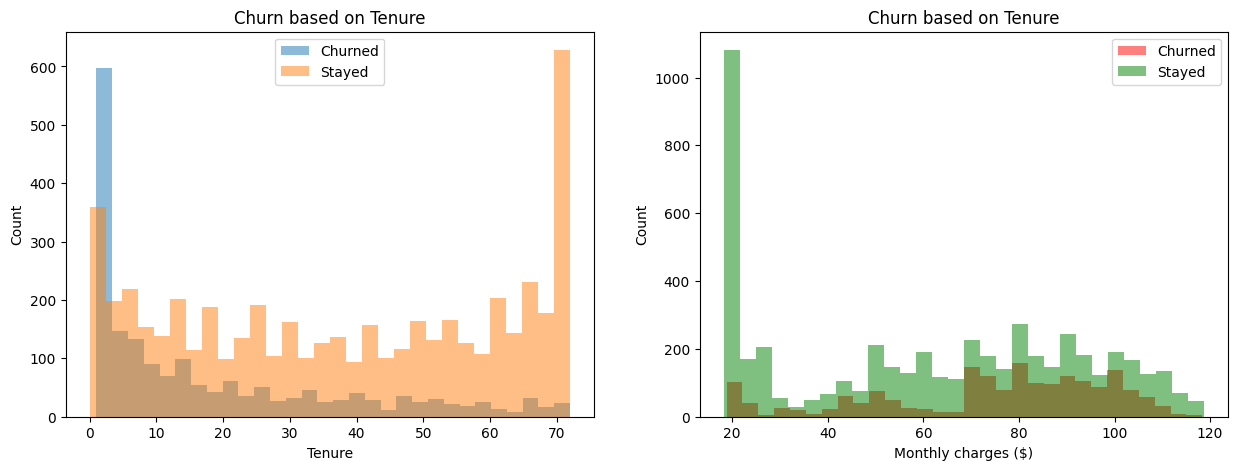

In [6]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
#visualization of tenure and the cound of how many churned or stayed (tenure based in months)
axes[0].hist(
    churn_data[churn_data['Churn'] == 'Yes']['tenure'],
    bins = 30,
    alpha = 0.5,
    label = 'Churned',
)
axes[0].hist(
    churn_data[churn_data['Churn'] == 'No']['tenure'],
    bins = 30,
    alpha = 0.5,
    label = 'Stayed'
)
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Count')
axes[0].set_title('Churn based on Tenure')
axes[0].legend()

axes[1].hist(
    churn_data[churn_data['Churn'] == 'Yes']['MonthlyCharges'],
    bins = 30,
    alpha = 0.5,
    label = 'Churned',
    color = 'red'
)
axes[1].hist(
    churn_data[churn_data['Churn'] == 'No']['MonthlyCharges'],
    bins = 30,
    alpha = 0.5,
    label = 'Stayed',
    color = 'green'
)
axes[1].set_xlabel('Monthly charges ($)')
axes[1].set_ylabel('Count')
axes[1].set_title('Churn based on Tenure')
axes[1].legend()

correlations between churn and features: 

MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.198324
tenure           -0.352229
Name: NumericChurn, dtype: float64


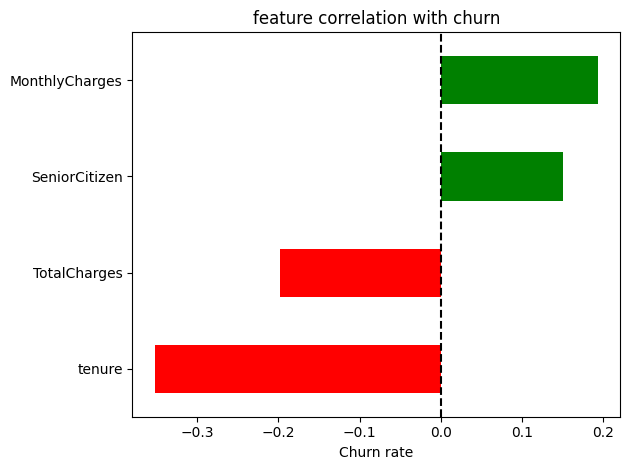

In [7]:
#Correlation with Churn
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'],errors = 'coerce')
churn_data['TotalCharges'] = churn_data['TotalCharges'].fillna(0)
numeric_churn = churn_data.copy()
numeric_churn['NumericChurn'] = (churn_data['Churn'] == 'Yes').astype(int)

numerical_cols = ['MonthlyCharges','TotalCharges','SeniorCitizen','tenure']
correlations = numeric_churn[numerical_cols + ['NumericChurn']].corr()['NumericChurn'].drop('NumericChurn')

print("correlations between churn and features: \n")
print(correlations.sort_values(ascending = False))

correlations.sort_values().plot(kind = 'barh',color = ['red' if x < 0 else 'green' for x in correlations.sort_values()])
plt.title('feature correlation with churn')
plt.xlabel('Churn rate')
plt.axvline(x = 0,linestyle = '--',color = 'black')
plt.tight_layout()
plt.show()

In [8]:
churn_data.drop(columns = ['customerID','TotalCharges'],inplace = True,errors = 'ignore')
print(churn_data.columns)
service_cols = ['PhoneService','InternetService','OnlineSecurity','TechSupport', 'StreamingTV','StreamingMovies']
churn_data['PricePerService'] = churn_data['MonthlyCharges'] / churn_data[service_cols].apply(lambda x : (x != 'No').sum() + 1, axis = 1) 
print("shape after dropping and adding a new feature: ",churn_data.shape)
print(f"PricePerService example:\n {churn_data['PricePerService'].describe()}")

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='str')
shape after dropping and adding a new feature:  (7043, 20)
PricePerService example:
 count    7043.000000
mean       14.181545
std         6.819540
min         3.041667
25%        10.800000
50%        14.925000
75%        19.305000
max        29.133333
Name: PricePerService, dtype: float64


In [9]:
binary_map = {'Yes' : 1, 'No' : 0, 'Male' : 1, 'Female' : 0}
binary_cols = ['gender','Partner','Dependents','PaperlessBilling','Churn','PhoneService']
for col in binary_cols:
    churn_data[col] = churn_data[col].map(binary_map)
churn_data[binary_cols].head()
print(churn_data[binary_cols].dtypes)
print(churn_data[binary_cols].isnull().sum()) 
print(f"\n Value counts {churn_data[binary_cols].value_counts()}")

gender              int64
Partner             int64
Dependents          int64
PaperlessBilling    int64
Churn               int64
PhoneService        int64
dtype: object
gender              0
Partner             0
Dependents          0
PaperlessBilling    0
Churn               0
PhoneService        0
dtype: int64

 Value counts gender  Partner  Dependents  PaperlessBilling  Churn  PhoneService
0       0        0           1                 0      1               527
1       0        0           1                 0      1               507
                             0                 0      1               472
0       0        0           0                 0      1               427
                             1                 1      1               405
                                                                     ... 
1       1        1           1                 1      0                 3
        0        1           1                 1      0                 2
           

In [10]:
multi_cols = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod',]
churn_data = pd.get_dummies(churn_data,columns = multi_cols,drop_first = True)


In [11]:
print(f"Shape after encoding: {churn_data.shape}")
print(f"All dtypes numeric: {all(churn_data.dtypes != 'object')}")

Shape after encoding: (7043, 31)
All dtypes numeric: True


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = churn_data.drop('Churn',axis = 1)
y = churn_data.Churn

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state = 42,stratify = y)

numerical_cols = ['tenure','MonthlyCharges','PricePerService']

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
print(f"Train: {X_train.shape} | Test: {X_test.shape}")
print("churn rate in train data")
print(Y_train.value_counts(normalize = True) * 100)
print(f"\n features: {list(X_train.columns)}")

Train: (5634, 30) | Test: (1409, 30)
churn rate in train data
Churn
0    73.464679
1    26.535321
Name: proportion, dtype: float64

 features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'PricePerService', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [16]:
for col in binary_cols:
    print(f"{col}: {churn_data[col].unique()}")
print(f"All dtypes numeric: {all(churn_data.dtypes != 'object')}")

gender: [0 1]
Partner: [1 0]
Dependents: [0 1]
PaperlessBilling: [1 0]
Churn: [0 1]
PhoneService: [0 1]
All dtypes numeric: True


In [43]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report
baseline_pred = np.zeros(len(Y_test))

print("baseline (predict always no churn) ")
print(f"accuracy: {accuracy_score(Y_test,baseline_pred):.2f}")
print(f"precision score: {precision_score(Y_test,baseline_pred,zero_division = 0):.2f}")
print(f"recall score: {recall_score(Y_test,baseline_pred,zero_division = 0):.2f}")
print(f"f1_score: {f1_score(Y_test,baseline_pred,zero_division = 0):.2f}")

baseline (predict always no churn) 
accuracy: 0.73
precision score: 0.00
recall score: 0.00
f1_score: 0.00


In [49]:
from xgboost import XGBClassifier
scale_pos_weight = Y_train.value_counts()[0] / Y_train.value_counts()[1]
print("scale_pos_weight",scale_pos_weight)

model = XGBClassifier(n_estimators = 100,max_depth = 5,learning_rate = 0.1,scale_pos_weight = scale_pos_weight,random_state = 42,eval_metric = 'logloss').fit(X_train,Y_train)
prediction = model.predict(X_test)

print(f"accuracy: {accuracy_score(Y_test,prediction):.2f}")
print(f"precision score: {precision_score(Y_test,prediction,zero_division = 0):.2f}")
print(f"recall score: {recall_score(Y_test,prediction,zero_division = 0):.2f}")
print(f"f1_score: {f1_score(Y_test,prediction,zero_division = 0):.2f}")
print("\nclassification report:")
print(classification_report(Y_test,prediction,target_names = ['No churn','Churn']))

scale_pos_weight 2.768561872909699
accuracy: 0.75
precision score: 0.52
recall score: 0.78
f1_score: 0.62

classification report:
              precision    recall  f1-score   support

    No churn       0.90      0.74      0.81      1035
       Churn       0.52      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

